$ \Large \textbf{Разложение гиперболического синуса в ряд тейлора} $

Для небольших x шинус приближенно равен

$$ sh(x) = \frac{1}{1!}x^1 + \frac{1}{3!}x^3 + \frac{1}{5!}x^5 + ... + R(x) = \sum_{n = 0}^{\inf}\frac{1}{(2n+1)!}x^{2n+1} + R(x)$$ 

причем $ R(x) \xrightarrow[n \rightarrow \infty]{} 0 $

Это частичная сумма ряда Тейлора:
$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

In [2]:
import math

ITERATIONS = 15


def my_sh(arg):
    """
    Функция, считающая гиперболический синус в
    окрестности нуля
    """
    x_power = arg
    multiplier = 1
    particial_sum = arg
    for i in range(1, ITERATIONS):
        x_power *= arg ** 2
        multiplier = multiplier / (2 * i) / (2 * i + 1)
        particial_sum += x_power * multiplier

    return particial_sum


help(math.sinh)
help(my_sh)

print(math.sinh(0.3))
print(my_sh(0.3))


Help on built-in function sinh in module math:

sinh(x, /)
    Return the hyperbolic sine of x.

Help on function my_sh in module __main__:

my_sh(arg)
    Функция, считающая гиперболический синус в
    окрестности нуля

0.3045202934471426
0.30452029344714254


Как видно, разложение функции в ряд Тейлора $ \text{--} $ очень мощная штука, точность подсчитывания шинуса составляет $ 10^{-15} $ всего для 15 членов! 

Проведем проверку на $ \text{\textbf{комплексность}} $ нашего шинуса

In [3]:
import cmath

complex_angle = cmath.asinh(5)
print('"Угол", на котором шинус достигает пяти:', complex_angle)

print("Достигает ли пяти фейк-шинус?", my_sh(complex_angle))
print("А библиотечный?", cmath.sinh(complex_angle))


"Угол", на котором шинус достигает пяти: (2.3124383412727525+0j)
Достигает ли пяти фейк-шинус? (5+0j)
А библиотечный? (4.999999999999999+0j)


Следующая проверка $ \text{-- \textbf{графическая}} $ 

<function my_sh at 0x10c7d5cf0> <numpy.vectorize object at 0x11f54a4a0>


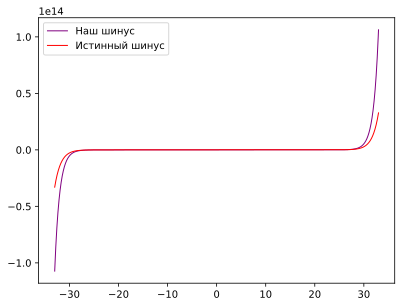

In [4]:
from cProfile import label
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg',  'pdf']
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np

vs = np.vectorize(my_sh)
print(my_sh, vs)

angles = np.r_[-33:33:0.01]
plt.plot(angles, np.sinh(angles), linewidth=1.0, color='purple', label='Наш шинус')
plt.plot(angles, vs(angles), linewidth=1.0, color='red', label='Истинный шинус')
plt.legend()
plt.show()
